In [1]:
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.constants import golden

In [2]:
acquisti = pd.read_csv('Acquisti o Ordini.csv', sep=',')

In [3]:
dataframe = acquisti[((acquisti['Tipo dato'] == "negli ultimi 3 mesi") | (acquisti['Tipo dato'] == "da 3 mesi a 1 anno fa")) & (acquisti['Sesso'] != "totale") & (acquisti['Classe di età'] == "14 anni e più")]
dataframe = dataframe.drop(columns=["Tipo dato", "Classe di età","TIPO_DATO_SDS_ICT", "SEXISTAT1", "ETA1", "Flag Codes", "TIME","Flags"], inplace=False)
dataframe

,Sesso,Seleziona periodo,Value
1920,maschi,2005,13.2
1921,maschi,2006,16.9
1922,maschi,2007,19.0
1923,maschi,2008,17.0
1924,maschi,2009,18.6
...,...,...,...
2011,femmine,2016,11.8
2012,femmine,2017,11.7
2013,femmine,2018,11.7
2014,femmine,2019,11.7


In [4]:
anni = dataframe['Seleziona periodo'].values.tolist()
anni = anni[:16]
anni

[2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [5]:
dataframe_m = dataframe[dataframe['Sesso'] == "maschi"]
dataframe_m = dataframe_m.drop(columns=["Sesso"])
dataframe_m = dataframe_m.groupby(['Seleziona periodo']).sum()
dataframe_m

,Value
Seleziona periodo,
2005,19.9
2006,26.1
2007,27.2
2008,28.1
2009,29.0
2010,30.8
2011,31.0
2012,32.0
2013,34.7


In [6]:
dataframe_f = dataframe[dataframe['Sesso'] == "femmine"]
dataframe_f = dataframe_f.drop(columns=["Sesso"])
dataframe_f = dataframe_f.groupby(['Seleziona periodo']).sum()
dataframe_f

,Value
Seleziona periodo,
2005,10.9
2006,16.4
2007,17.2
2008,16.9
2009,18.7
2010,21.1
2011,21.3
2012,24.2
2013,28.0


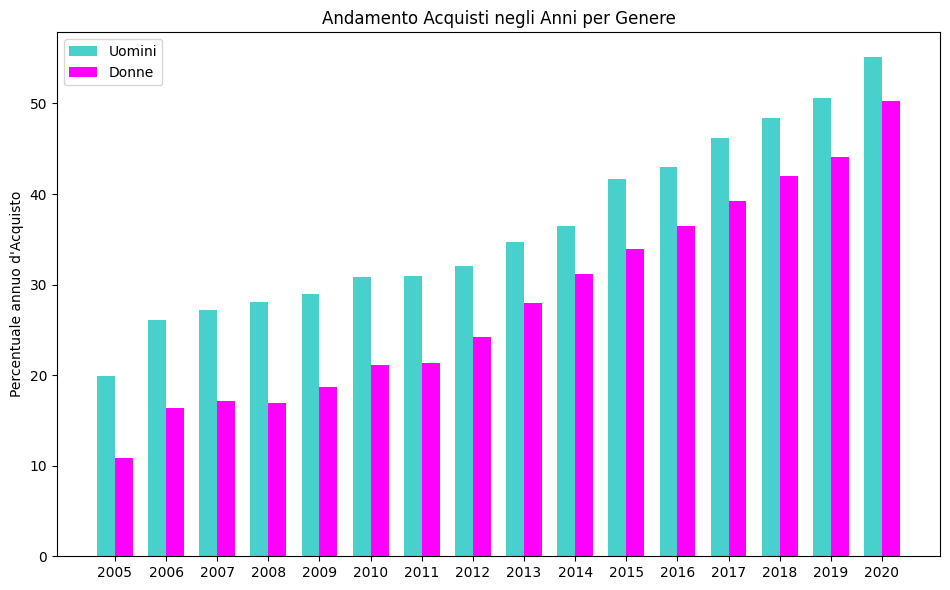

In [10]:
plt.rc('figure', figsize=(9.6, 6.0))
labels = anni
men_means = dataframe_m["Value"]
women_means = dataframe_f["Value"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Uomini', color = "mediumturquoise")
rects2 = ax.bar(x + width/2, women_means, width, label='Donne', color = "Magenta")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Percentuale annuo d'Acquisto")
ax.set_title('Andamento Acquisti negli Anni per Genere')
ax.set_xticks(x, labels)
ax.legend()


fig.tight_layout()

plt.show()